# Microsoft Movie Studio Analysis 


* Student name/ Author: Heath Rittler
* Student pace: self paced
* Scheduled project review date/time: 8/1/2022
* Instructor name: Claude Fried

# Introduction
Microsoft wants to create original video content. However, they do not know much about creating movies, or which types of movies are most successful at the box office. The purpose of this analysis is to evaluate box office data and to provide Microsoft with recommendations on which types of content would make them most successful in their endeavor.

Suggestions for types of content:

Create movies that have the highest ROI to maximize initial investment & early profitability.
Focus on movies that are appealing to a broader audience and international box offices.
Develop franchise movies to optimize box office performance and additional opportunities for monetization.

In [1]:
# import cleaning, analysis, and charting packages

import pandas as pd
import numpy as np
import sqlite3
import requests as rq
from sklearn.preprocessing import OneHotEncoder
from zipfile import ZipFile
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


%matplotlib inline
plt.style.use('seaborn-talk')

# Datasets explore
Viewing and connecting to initial datasets that were provided.  Including dataset that I found as well through Opus.

## bom.movie_gross dataset

In [2]:
df = pd.read_csv('data/bom.movie_gross.csv')
df.head()
## need tmdb.movies file for genres

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
print('The "bom.movie_gross.csv" dataset starts in year', df['year'].min(),'and ends in', df['year'].max(),'.')
print('There are', df['title'].count(),'movie title records in the dataset.')

The "bom.movie_gross.csv" dataset starts in year 2010 and ends in 2018 .
There are 3387 movie title records in the dataset.


In [4]:
#cleaning gnarliness in the foreign gross column and changing to int
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')
df = df.dropna(subset=['foreign_gross'])
df['foreign_gross'] = df['foreign_gross'].astype(int)

Dataset is pretty simple.  Looking for more data around performance to understand success.  Would be a good dataframe to join if needed split between domestic and foreign gross box office performance or studio information.

## tmdb.movies dataset

In [5]:
data = pd.read_csv('data/tmdb.movies.csv')
data.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Dataset has good information around popularity and consumer sentiment around interest.  Good information, however, I think revenue will be more import.  Interesting information around genre, and language.  Also has specific release date vs release year.

## budgets dataset

In [7]:
budgets = pd.read_csv('data/tn.movie_budgets.csv')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Another simple dataset, however includes budget!  Will continue to review all the datasets to understand best suited for my analysis.

## Mov_Info dataset

In [9]:
mov_info = pd.read_csv('data/rt.movie_info.tsv', sep='\t')
mov_info.head()
#keep id, synopsis, rating, genre, theatre date, dvd date, runtime, studio

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [10]:
mov_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


Interesting information around synopsis, rating, writer, director, however not a lot of records in this dataset.  Concern would be getting into small sample sizes with 1 to 2 filters.

## rt.reviews dataset

In [11]:
reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t', encoding= 'unicode_escape')
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


Once again interesting information around reviews and consumer sentiment, but not sure if that always translates to box office success.  Going to continue to move on until find a dataset with good information around return.

## Movies SQL database

In [13]:
# movie_basics and movie_ratings tables are most relevant
conn = sqlite3.connect('data/im.db')

lang = pd.read_sql("""SELECT * FROM movie_basics mb 
            LEFT JOIN movie_akas ma ON mb.movie_id = ma.movie_id
            ;""", conn)

In [14]:
lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355545 entries, 0 to 355544
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           355545 non-null  object 
 1   primary_title      355545 non-null  object 
 2   original_title     355513 non-null  object 
 3   start_year         355545 non-null  int64  
 4   runtime_minutes    314219 non-null  float64
 5   genres             348882 non-null  object 
 6   movie_id           331703 non-null  object 
 7   ordering           331703 non-null  float64
 8   title              331703 non-null  object 
 9   region             278410 non-null  object 
 10  language           41715 non-null   object 
 11  types              168447 non-null  object 
 12  attributes         14925 non-null   object 
 13  is_original_title  331678 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 38.0+ MB


In [15]:
conn.close()

A lot of information in this database, however still not includes all fields that I am interested in understanding.  Moving on to external datasets to understand if there is something I can review and or join back to this information that was curated.

## Opus Movie Data

In [16]:
mdo = pd.read_csv('data/MovieData.csv')
mdo.head()

,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time
0,Madea's Family Reunion,2006,8220100,10000000,63257940,62581,PG-13,Contemporary Fiction,Based on Play,Live Action,Comedy,1.0,NaN
1,Krrish,2006,58540100,10000000,1430721,31000000,Not Rated,Science Fiction,Original Screenplay,Live Action,Action,1.0,NaN
2,End of the Spear,2006,34620100,10000000,11748661,175380,PG-13,Historical Fiction,Original Screenplay,Live Action,Drama,0.0,NaN
3,A Prairie Home Companion,2006,24910100,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,105.0
4,Saw III,2006,5840100,10000000,80238724,83638091,R,Contemporary Fiction,Original Screenplay,Live Action,Horror,1.0,NaN


In [17]:
mdo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movie_name                1936 non-null   object 
 1   production_year           1936 non-null   int64  
 2   movie_odid                1936 non-null   int64  
 3   production_budget         1936 non-null   int64  
 4   domestic_box_office       1936 non-null   int64  
 5   international_box_office  1936 non-null   int64  
 6   rating                    1913 non-null   object 
 7   creative_type             1923 non-null   object 
 8   source                    1915 non-null   object 
 9   production_method         1925 non-null   object 
 10  genre                     1926 non-null   object 
 11  sequel                    1934 non-null   float64
 12  running_time              1822 non-null   float64
dtypes: float64(2), int64(5), object(6)
memory usage: 196.8+ KB


This dataset has the most interesting categories to me and what I am trying to understand about movie success.  Even though the films have a budget of >= $10M, I think that we can deliberately call that out as a part of the parameters reviewed.  I don't think Microsoft will be moving into the industry without expecting an investment.  With that being said, my focus is to understand how can we give Microsoft the best recommendations to maximize their ROI.

# Opus Movie Data Selection

## OpusData ***Cleaning***

In [18]:
# read in dataframe from OpusData CSV.
df = pd.read_csv('data/MovieData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movie_name                1936 non-null   object 
 1   production_year           1936 non-null   int64  
 2   movie_odid                1936 non-null   int64  
 3   production_budget         1936 non-null   int64  
 4   domestic_box_office       1936 non-null   int64  
 5   international_box_office  1936 non-null   int64  
 6   rating                    1913 non-null   object 
 7   creative_type             1923 non-null   object 
 8   source                    1915 non-null   object 
 9   production_method         1925 non-null   object 
 10  genre                     1926 non-null   object 
 11  sequel                    1934 non-null   float64
 12  running_time              1822 non-null   float64
dtypes: float64(2), int64(5), object(6)
memory usage: 196.8+ KB


In [19]:
# removed na data from the dataset.  1,795 values remain.
mdo = df.dropna(axis=0)
mdo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1795 entries, 3 to 1935
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movie_name                1795 non-null   object 
 1   production_year           1795 non-null   int64  
 2   movie_odid                1795 non-null   int64  
 3   production_budget         1795 non-null   int64  
 4   domestic_box_office       1795 non-null   int64  
 5   international_box_office  1795 non-null   int64  
 6   rating                    1795 non-null   object 
 7   creative_type             1795 non-null   object 
 8   source                    1795 non-null   object 
 9   production_method         1795 non-null   object 
 10  genre                     1795 non-null   object 
 11  sequel                    1795 non-null   float64
 12  running_time              1795 non-null   float64
dtypes: float64(2), int64(5), object(6)
memory usage: 196.3+ KB


Cleaned dataframe and created a new variable called 'mdo_clean'.  This variable which now includes 1,795 records will be the dataset in which I perform my analysis.  After viewing the the fields available, I have decided to create a few additional measures and categorical variables or dimensions.  I used a pretty heavy hand when cleaning, I didn't lose a ton of records in this process..moving forward with analysis.

In [20]:
# Adding total box office metric, which is the sum of the domestic and international box offices.
mdo_clean = mdo.copy()
mdo_clean.loc[:,'total_box_office'] = (
    mdo['domestic_box_office'] + mdo['international_box_office']
    )

mdo_clean.head()


,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time,total_box_office
3,A Prairie Home Companion,2006,24910100,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,105.0,26716191
5,Employee of the Month,2006,19540100,10000000,28444855,9920000,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,108.0,38364855
13,Crank,2006,19850100,12000000,27838408,16086515,R,Contemporary Fiction,Original Screenplay,Live Action,Action,0.0,88.0,43924923
14,Fateless,2006,75540100,12000000,196857,0,R,Historical Fiction,Based on Fiction Book/Short Story,Live Action,Drama,0.0,140.0,196857
16,Step Up,2006,7780100,12000000,65328121,45661036,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Drama,0.0,103.0,110989157


In [21]:
# Adding ROI cacluation (total box office/ production budget - 1)
mdo_clean.loc[:,'return'] = (
    mdo_clean['total_box_office']/ mdo_clean['production_budget'] - 1
    )

mdo_clean.head()

,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time,total_box_office,return
3,A Prairie Home Companion,2006,24910100,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,105.0,26716191,1.671619
5,Employee of the Month,2006,19540100,10000000,28444855,9920000,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,108.0,38364855,2.836486
13,Crank,2006,19850100,12000000,27838408,16086515,R,Contemporary Fiction,Original Screenplay,Live Action,Action,0.0,88.0,43924923,2.660410
14,Fateless,2006,75540100,12000000,196857,0,R,Historical Fiction,Based on Fiction Book/Short Story,Live Action,Drama,0.0,140.0,196857,-0.983595
16,Step Up,2006,7780100,12000000,65328121,45661036,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Drama,0.0,103.0,110989157,8.249096


In [22]:
# Adding percent of international to total box office
mdo_clean.loc[:,'percent_of_int'] = (
    mdo_clean['international_box_office'] / mdo_clean['total_box_office']
    )

mdo_clean.head()

,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time,total_box_office,return,percent_of_int
3,A Prairie Home Companion,2006,24910100,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,105.0,26716191,1.671619,0.238557
5,Employee of the Month,2006,19540100,10000000,28444855,9920000,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,108.0,38364855,2.836486,0.258570
13,Crank,2006,19850100,12000000,27838408,16086515,R,Contemporary Fiction,Original Screenplay,Live Action,Action,0.0,88.0,43924923,2.660410,0.366228
14,Fateless,2006,75540100,12000000,196857,0,R,Historical Fiction,Based on Fiction Book/Short Story,Live Action,Drama,0.0,140.0,196857,-0.983595,0.000000
16,Step Up,2006,7780100,12000000,65328121,45661036,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Drama,0.0,103.0,110989157,8.249096,0.411401


In [23]:
# adding flag for profitability.
conditions = [mdo_clean.loc[:,'return'] >= 0,
              mdo_clean.loc[:,'return'] < 0]

values = [1,0]

mdo_clean.loc[:,'is_profitable'] = np.select(conditions, values, default=0)
mdo_clean.groupby('rating')['is_profitable'].mean()

rating
G            0.911765
NC-17        1.000000
Not Rated    0.606061
PG           0.848993
PG-13        0.823370
R            0.682540
Name: is_profitable, dtype: float64

In [24]:
# adding friendly label for sequel categorical
conditions = [mdo_clean.loc[:,'sequel'] > 0,
              mdo_clean.loc[:,'sequel'] == 0]

values = ['Has Sequel','No Sequel']

mdo_clean.loc[:,'is_sequel'] = np.select(conditions, values, default=0)

Since my primary focus for "success" is ROI, I have added a total box office category, along with a ROI measure, and a profitablitiy flag.  In addition to adding these columns, I added a charting friendly categorical variable for the sequel column.

## OpusData ***Analysis***

In [25]:
# Summary stats for numeric columns; initial understanding of data distribution and which
# measure of central tendency will be best applied for my analyses.

mdo_clean.describe()

,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,sequel,running_time,total_box_office,return,percent_of_int,is_profitable
count,1795.000000,1.795000e+03,1.795000e+03,1.795000e+03,1.795000e+03,1795.000000,1795.000000,1.795000e+03,1795.000000,1795.000000,1795.000000
mean,2011.533705,1.382248e+08,5.558087e+07,6.829396e+07,1.011146e+08,0.154318,109.650139,1.694086e+08,1.969244,0.512994,0.771031
std,3.367719,8.241984e+07,5.484957e+07,8.968159e+07,1.641493e+08,0.361354,18.807721,2.450705e+08,3.165710,0.251563,0.420287
min,2006.000000,2.010000e+04,1.000000e+07,0.000000e+00,0.000000e+00,0.000000,0.000000,3.471000e+03,-0.999769,0.000000,0.000000
25%,2009.000000,5.822510e+07,2.000000e+07,1.431418e+07,1.059444e+07,0.000000,97.000000,3.073615e+07,0.107476,0.358257,1.000000
50%,2011.000000,1.451401e+08,3.500000e+07,3.853638e+07,3.884555e+07,0.000000,108.000000,8.013139e+07,1.191709,0.536256,1.000000
75%,2015.000000,2.008451e+08,7.000000e+07,8.446791e+07,1.112000e+08,0.000000,120.000000,1.976529e+08,2.808079,0.678967,1.000000
max,2018.000000,3.348301e+08,4.250000e+08,9.366622e+08,2.015838e+09,1.000000,201.000000,2.776345e+09,43.895652,1.000000,1.000000


In [26]:
# Organizing counts and total box office sum for summary chart

counts = (
    mdo_clean
    .groupby('production_year')['movie_odid']
    .count()
    .reset_index()
    )

totalboxyear = (
    mdo_clean
    .groupby('production_year')['total_box_office']
    .sum()
    .reset_index()
    )


result = pd.merge(counts, totalboxyear, how="inner", on=['production_year', 'production_year'])
result

,production_year,movie_odid,total_box_office
0,2006,96,13139666540
1,2007,133,17609479712
2,2008,169,20841914089
3,2009,175,24708029118
4,2010,226,28282185867
5,2011,185,35216319041
6,2012,96,19885339850
7,2013,122,21668174194
8,2014,142,28684658909
9,2015,160,27279573182


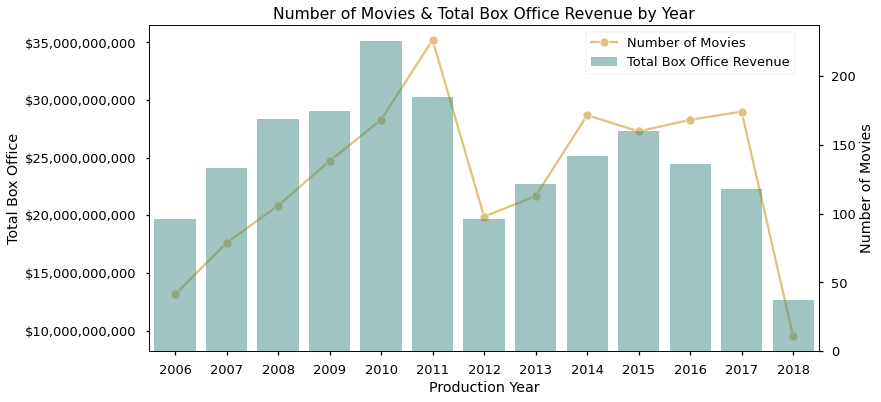

In [27]:
# Summary chart for number of movies and total box office by year

fig, ax1 = plt.subplots(figsize=(12,6))

lp = sns.lineplot(data = result['total_box_office'], 
                  marker='o', 
                  sort = False, 
                  ax=ax1, 
                  label='Number of Movies', 
                  color='#dfc27d')

ax2 = ax1.twinx()

bp = sns.barplot(data = result, 
                 x='production_year', 
                 y='movie_odid', 
                 alpha=0.5, 
                 ax=ax2, 
                 color='#35978f', 
                 label='Total Box Office Revenue')

ax1.set_title('Number of Movies & Total Box Office Revenue by Year')
ax1.set_xlabel('Production Year')
ax1.set_ylabel('Total Box Office')
ax2.set_ylabel('Number of Movies')
fig.legend(loc='upper right', bbox_to_anchor=(.88,.88))
ax1.get_legend().remove()
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick);

Initial chart to understand values and trends over time.  Focusing on the macro trends, the number of records and total box office spend for each time period represented.  Based on this visualization, I have a better understanding of which years I should not weight disproportionally (i.e. 2012, 2018).  It would be interesting to understand at a macro level what happened in 2012, because it seems as if movies that are included in this dataset both dropped off from a release count perspective and a total box office.  Since I only have year in this dataset, and not date, I have decided not to focus too much on date.

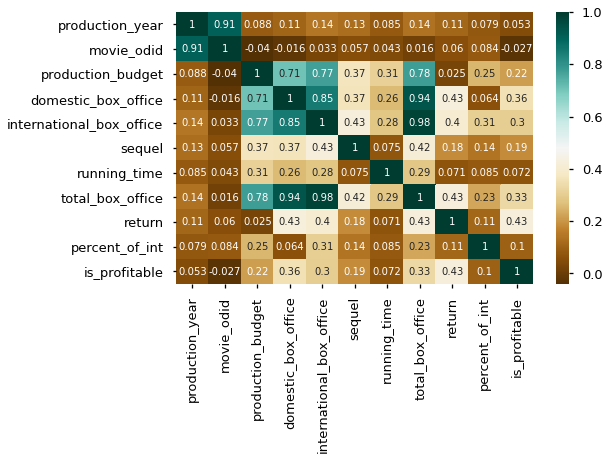

In [28]:
# Correlation matrix of numerical values in opus dataset.  

plt.figure(figsize = (8,5))
corrM = mdo_clean.corr()

sns.heatmap(corrM, annot=True, cmap='BrBG')
plt.show()

Stronger positive correlations exist between box office results and production budget.  This gives me confidence in my
data set since I selected a data set that was limited to larger budgets.  Would like to further evaluate international box office as a potential solution.

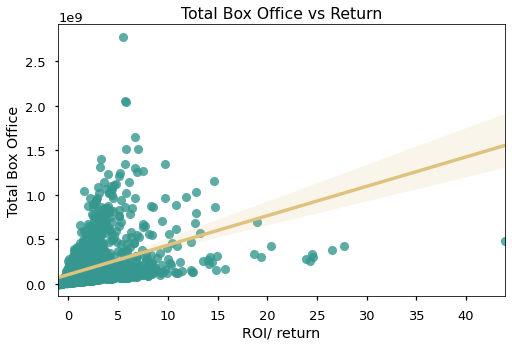

In [29]:
#sns.scatterplot(data=mdo_clean, x='return', y='total_box_office')

plt.figure(figsize = (8,5))

rp = sns.regplot(x='return',
            y='total_box_office', 
            data=mdo_clean,
            scatter_kws={"color": '#35978f'}, 
            line_kws={"color": '#dfc27d'})

rp.set_ylabel('Total Box Office')
rp.set_xlabel('ROI/ return')
rp.set_title('Total Box Office vs Return');

Visualized total box office and return in a different way vs the correlation matrix above, displaying the strong positive relationship.

### Argument for "Family Movies"

Create movies that have the highest ROI to maximize initial investment & early profitability.

Rating seems to be a interesting category to understand.  I charted a quick count of records to make sure the categories I was comparing had enough experience.

In [30]:
# Summary of totals by rating category

(mdo_clean
 .groupby(['rating'])
 .sum()
 .reset_index()
 .sort_values(by='total_box_office', 
              ascending=False)
)

,rating,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,sequel,running_time,total_box_office,return,percent_of_int,is_profitable
4,PG-13,1480530,99547583600,51482400000,64071363498,98938185069,136.0,83164.0,163009548567,1528.804234,366.309436,606
3,PG,599407,38854699800,21963600000,27868757027,42455279143,55.0,29786.0,70324036170,611.561885,155.396715,253
5,R,1394012,100226299300,23256270000,27687192501,33370015189,75.0,76899.0,61057207690,1245.657447,350.243995,473
0,G,68321,2853693400,2357500000,2894929346,4866246539,9.0,3181.0,7761175885,92.649955,19.269808,31
2,Not Rated,66426,6583723300,692900000,60805933,1810491681,2.0,3634.0,1871297614,52.774112,28.675472,20
1,NC-17,2007,47450100,15000000,4604982,60562448,0.0,158.0,65167430,3.344495,0.929336,1


''

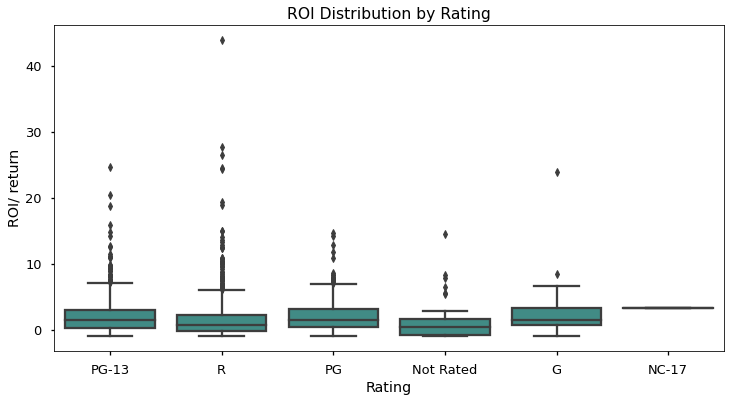

In [31]:
# Creating boxplots of return by rating to understand the distribution of ROI between rating categories.

fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('ROI Distribution by Rating')


bp = sns.boxplot(data=mdo_clean, 
            y='return', 
            x='rating', 
            color='#35978f')

bp.set_ylabel('ROI/ return')
bp.set_xlabel('Rating')
;

PG-13 total box office driven by outliers.  G rated movies have the highest median (total) box office performance, however not a lot of experience.   PG rated movies have both a high median and a decent amount of experience at the box office.  I am going to group these variables together into a 'family' flag next to see how the experience weights the results.

In [32]:
# adding flag for 'family movies' vs 'non-family movies'.  'family movies' defined as IN (G, PG, PG-13).

conditions = (
    [mdo_clean.loc[:,'rating']
     .isin(['G', 'PG', 'PG-13']),
              
     mdo_clean.loc[:,'rating']
     .isin(['Not Rated', 'NC-17', 'R'])]
    )

values = ['Family','Non-Family']

mdo_clean.loc[:,'Family'] = np.select(conditions, values, default=0)
mdo_clean['Family'].value_counts()

Family        1068
Non-Family     727
Name: Family, dtype: int64

In [33]:
# Median values for family vs non family numerical data.

fam_group = (
    mdo_clean.groupby('Family')
    .median()
    .reset_index()
    )

fam_group

,Family,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,sequel,running_time,total_box_office,return,percent_of_int,is_profitable
0,Family,2011.0,143645100.0,45000000.0,53303923.5,58189214.0,0.0,107.0,114660599.5,1.423386,0.547821,1.0
1,Non-Family,2011.0,149540100.0,25000000.0,23591043.0,23334984.0,0.0,110.0,48977233.0,0.768996,0.523360,1.0


''

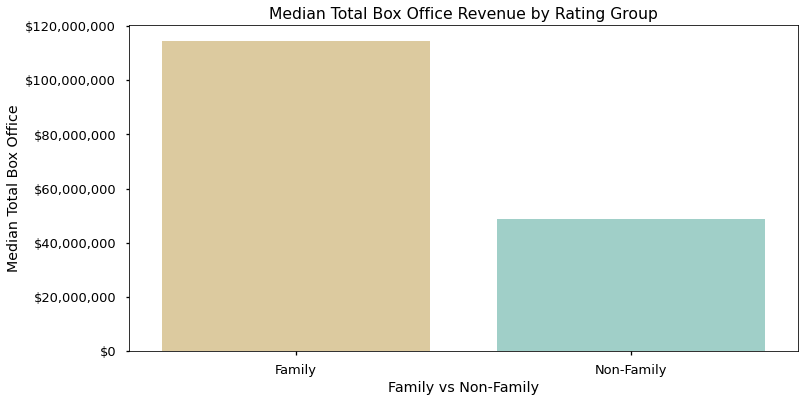

In [34]:
# Chart to show delta between family and non family median international box office.

fig, ax = plt.subplots(figsize=(12,6))

bp = sns.barplot(data=fam_group, 
            y='total_box_office', 
            x='Family', 
            palette = 'BrBG')

bp.set_ylabel('Median Total Box Office')
bp.set_xlabel('Family vs Non-Family')
bp.set_title('Median Total Box Office Revenue by Rating Group')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
;

Family movies clearly have a higher median box office vs non-family movies.  This is primarily being driven by a higher percentage of international movie box office percentages - shown below.

In [35]:
mdo_clean.groupby('rating')['percent_of_int'].median()

#plt.figure(figsize = (8,4))
#sns.barplot(y='percent_of_int', x='rating', data = fam_mov, palette='BrBG', order = fam_mov.sort_values('percent_of_int', ascending = True).rating)

#Not rated, and NC-17 rated movies have a higher international box office impact on the total box office.  G/PG/PG-13 also perform better than R rated movies on the international stage.

rating
G            0.613246
NC-17        0.929336
Not Rated    0.986614
PG           0.555254
PG-13        0.535883
R            0.508475
Name: percent_of_int, dtype: float64

In [36]:
# create variable/ pivot table to undersand return within family and non family movies

medfams = pd.pivot_table(mdo_clean, 
                         values='return', 
                         columns='Family', 
                         index='production_year', 
                         aggfunc=np.median, 
                         fill_value=0)

medfams

Family,Family,Non-Family
production_year,,
2006,0.908239,0.379025
2007,1.454847,0.611666
2008,1.206220,0.456290
2009,1.087926,0.629676
2010,1.197185,0.509634
2011,1.475338,0.658262
2012,1.466032,1.224738
2013,1.669760,1.236402
2014,1.929897,0.691226


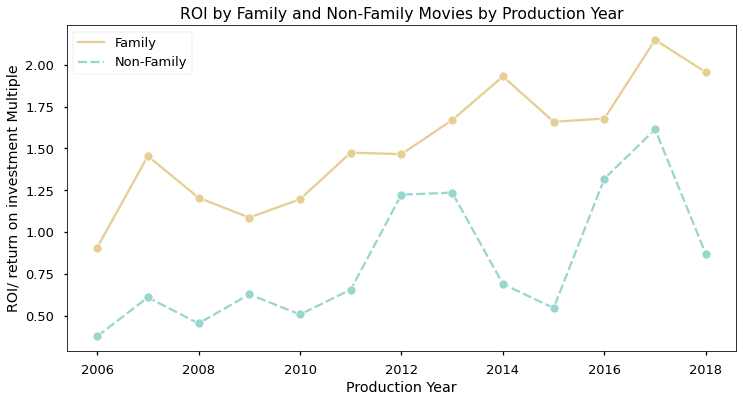

In [37]:
# create chart showing roi for fam vs non fam movies by year

plt.subplots(figsize=(12,6))

lp = sns.lineplot(data = medfams, marker='o', sort = False, palette='BrBG')

lp.set_title('ROI by Family and Non-Family Movies by Production Year')
lp.set_xlabel('Production Year')
lp.set_ylabel('ROI/ return on investment Multiple')
lp.legend(title = False);

Family movies have consistently performed better over the experience in this period.  Even though there are a few ups and downs in the line chart, the relative ratio to non-family movies is pretty clear.  Going to create a family movie specific dataset now and continue my analysis within family rated movies only.

In [38]:
# create new dataframe with G, PG, and PG-13 titles only.

fam_mov = (
    mdo_clean[mdo_clean['rating']
              .isin(['G', 'PG', 'PG-13'])]
    )

fam_mov.head()

,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time,total_box_office,return,percent_of_int,is_profitable,is_sequel,Family
3,A Prairie Home Companion,2006,24910100,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,105.0,26716191,1.671619,0.238557,1,No Sequel,Family
5,Employee of the Month,2006,19540100,10000000,28444855,9920000,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,108.0,38364855,2.836486,0.258570,1,No Sequel,Family
16,Step Up,2006,7780100,12000000,65328121,45661036,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Drama,0.0,103.0,110989157,8.249096,0.411401,1,No Sequel,Family
23,An American Haunting,2006,130560100,14000000,16298046,14145231,PG-13,Historical Fiction,Based on Fiction Book/Short Story,Live Action,Horror,0.0,83.0,30443277,1.174520,0.464642,1,No Sequel,Family
28,Flicka,2006,24440100,15000000,21000147,896220,PG,Contemporary Fiction,Based on Fiction Book/Short Story,Live Action,Drama,0.0,95.0,21896367,0.459758,0.040930,1,No Sequel,Family


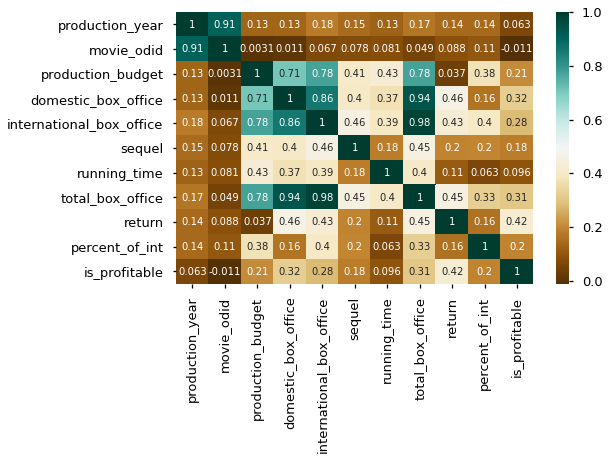

In [39]:
# Correlation matrix of family movie data to understand any relationships between variables.

plt.figure(figsize = (8,5))
corrFamMov = fam_mov.corr()

sns.heatmap(corrFamMov, annot=True, cmap='BrBG')
plt.show()

Displayed a correlation matrix to determine any relationships between our numerical values.  Family movies are still showing strong relationships between box office performance, and production budget.

### Argument for Animated Movies

Focus on movies that have a production method of animation vs live action.

In [40]:
# Create a field that groups our production methods together into a group.  This will make understanding easier
# as most of the categories will be listed under animation.

# Create a list of our conditions
conditions = (
    [mdo_clean.loc[:,'production_method']
     .isin(['Live Action']),
              
     mdo_clean.loc[:,'production_method']
     .isin(['Animation/Live Action',
        'Digital Animation',
        'Stop-Motion Animation',
        'Hand Animation',
        'Multiple Production Methods',
        'Rotoscoping'])]
    )

# Create a list of the values we want to assign for each condition
values = ['Live Action','Animation']


# Create a new column and use np.select to assign values to it using our lists as arguments
mdo_clean.loc[:,'prod_method_group'] = np.select(conditions, values, default=0)
mdo_clean['prod_method_group'].value_counts()

Live Action    1560
Animation       235
Name: prod_method_group, dtype: int64

In [41]:
mdo_clean.groupby('prod_method_group')['return'].median()

prod_method_group
Animation      1.800777
Live Action    1.101905
Name: return, dtype: float64

Animated movies have a 60% higher median return vs live action films.

In [42]:
# Creating a pivot table to show the rating records between animated and non-animated movies.
# Just making sure there is representation in each category (i.e. not all rated R movies are live action)
pd.pivot_table(mdo_clean, 
                        values='return', 
                        columns='prod_method_group', 
                        index='rating', 
                        aggfunc='count', 
                        fill_value=0)

prod_method_group,Animation,Live Action
rating,,
G,23,11
NC-17,0,1
Not Rated,3,30
PG,160,138
PG-13,39,697
R,10,683


In [43]:
# Dataframe to plot median total box office by year, and production year.

intarg = (
    mdo_clean
    .groupby(['prod_method_group', 'production_year'])['total_box_office']
    .median()
    .reset_index()
    )

intarg

,prod_method_group,production_year,total_box_office
0,Animation,2006,115954793.5
1,Animation,2007,408383484.0
2,Animation,2008,194980101.5
3,Animation,2009,270997378.0
4,Animation,2010,199256333.5
5,Animation,2011,362485352.0
6,Animation,2012,375740705.0
7,Animation,2013,269806430.0
8,Animation,2014,353756621.0
9,Animation,2015,301209748.5


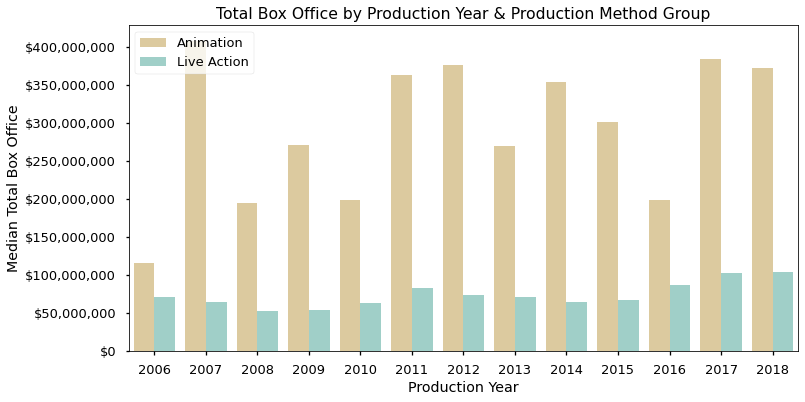

In [44]:
# Chart to show grouping above of median total box office by production method group and year.

fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(data = intarg, 
            x='production_year', 
            y='total_box_office', 
            hue='prod_method_group', 
            palette='BrBG')

ax1.set_title('Total Box Office by Production Year & Production Method Group')
ax1.set_xlabel('Production Year')
ax1.set_ylabel('Median Total Box Office')
ax1.legend(title = False, loc='upper left')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick);

Animated movies have a higher median total box office performance year over year.  We know this value is higher, but this chart shows that
animated movies have performed this way consistently over time.  There is a little variance between years when looking at animated movies alone, however
that is most likely due to the smaller sample size.

### Argument for Sequels

Develop franchise movies to optimize box office performance and additional opportunities for monetization.

In [45]:
# Group by sequel flag to understand impact within family movies.

fam_mov.groupby('sequel').median()

,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,running_time,total_box_office,return,percent_of_int,is_profitable
sequel,,,,,,,,,,
0.0,2011.0,141835100.0,39000000.0,43684162.5,45732940.0,106.0,90140118.0,1.182864,0.508073,1.0
1.0,2013.0,160385100.0,125000000.0,139990127.5,243964033.5,113.0,385504519.0,2.599259,0.637483,1.0


In [46]:
# create variable for grouping percent of international box office sequel, and year.

fambox = pd.pivot_table(fam_mov, 
                        values='return', 
                        columns='sequel', 
                        index='production_year', 
                        aggfunc=np.median, 
                        fill_value=0)

fambox

sequel,0.0,1.0
production_year,,
2006,0.785761,2.694373
2007,1.386720,2.415718
2008,1.149311,1.626732
2009,0.822305,2.740855
2010,1.131426,1.794282
2011,1.081241,2.930699
2012,0.894264,2.717942
2013,1.228403,2.583173
2014,1.731787,2.791125


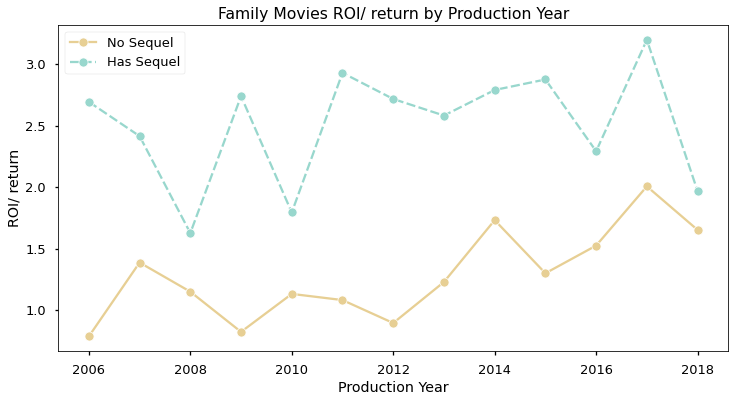

In [47]:
# Chart showing data above

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = fambox,
             marker='o',
             palette='BrBG')

ax1.set_title('Family Movies ROI/ return by Production Year')
ax1.set_xlabel('Production Year')
ax1.set_ylabel('ROI/ return')
ax1.legend(title = False, labels=['No Sequel', 'Has Sequel']);

Movies that have a sequel have performed better on the international stage.  Having a higher percentage of international box office has a higher return median.  Thus with these variables, having a sequel or franchise based movies, will further ensure success for return on investment.

In [48]:
# high level view of genre movie counts, just understanding records between the categories.

fam_mov['production_method'].value_counts()

Live Action              846
Digital Animation        135
Animation/Live Action     73
Stop-Motion Animation      9
Hand Animation             5
Name: production_method, dtype: int64

In [49]:
# creating a pivot table for charting below.

tabledf = (
    fam_mov
    .groupby(['sequel', 'production_method'])['return']
    .median()
    .reset_index()
    )

tabledf

,sequel,production_method,return
0,0.0,Animation/Live Action,1.867156
1,0.0,Digital Animation,1.447918
2,0.0,Hand Animation,1.580927
3,0.0,Live Action,1.131426
4,0.0,Stop-Motion Animation,0.865771
5,1.0,Animation/Live Action,2.841467
6,1.0,Digital Animation,2.856657
7,1.0,Live Action,2.468451


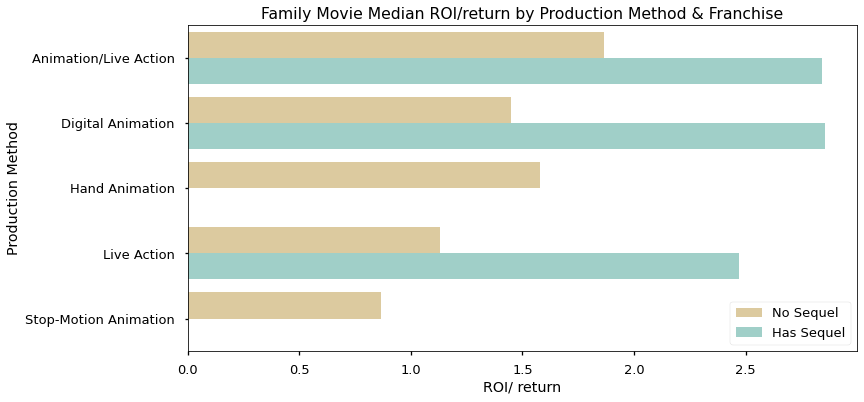

In [50]:
labels = ['No Sequel', 'Has Sequel']

fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data = tabledf, 
            x='return', 
            y='production_method', 
            hue='sequel', 
            orient='h', 
            palette='BrBG'
            )

ax.set_title('Family Movie Median ROI/return by Production Method & Franchise')
ax.set_xlabel('ROI/ return')
ax.set_ylabel('Production Method')


h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, loc='lower right');


We know that movies with a sequel have a higher return.  In addition, family rated movies that have a sequel perform the best as animated films.

# Conclusion


Most movies that were released in this data set (between 2006 and 2018, and have a budget of over $10M) are profitable.  However, when you start to look at the type of content (rating) of the movies, you can begin to dicern a higher probability of profitability.  Something that is really important for a company that is just beginning their content journey.

For Microsoft, creating profitable movies from the start of the studio will help their chances of being successful, and funding additional films with revenue generated from previous movies.  In summary, focusing on these 3 movie attributes and distribution will make them most successful:

1.  **Create G, PG, PG-13 (“Family”) rated movies to optimize ROI.**
2.  **Animated movies perform the best at the box office.**
3.  **Develop franchise movies to optimize box office performance & ROI.**



# Next Steps

Further analyses could yield additional insights to further improve success at Microsoft:

1. **Look at production studio data to determine inital success of movies types within the suggested rating categories.** 
2. **Understand review data and how it impacts success for both studio, and franchises.**
3. **Look at sequel success in relation to cast consistency;  are people going to see the movie because of the story, or the cast.**